<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [9]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape[0]
#I was debating if I should approach this using .info() or .shape[]. Because the 2nd question asked me to check the 
#data type of each column, I decided to use .shape[] for question 1 and .info() for question 2, but I think .info()
#could have answered both questions

979

In [4]:
movies.shape[1]

6

#### Check the data type of each column.

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [6]:
movies['duration'].mean()
#I selected the duration label and used the mean method. 

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
movies.sort_values('duration',ascending=True)
#I sorted movies by the label duration, and the first value shows the shortest movie "Freaks" and the last value 
#shows the longest movie Hamlet. I didn't know if the question was asking me to find the min or max duration and
#display that movie's title, or if the simple sort I did was sufficient.

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

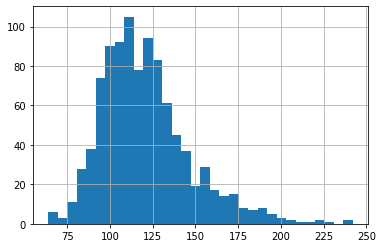

In [8]:
movies['duration'].hist(bins=32);
#I didn't know much about bins, so I did some research on what the optimal number of bins are. I naturally entered
#only a handful of bins to start, e.g. 5, and I found the table to be quite block. I found out one suggested approach
#is to take the square root of the number of observations and round up. Since there are around 1,000 observations, '
#I tried 32 bins. This led to a more bell like curve and highlighted that most films have a duration around 110 min

#### Use a box plot to display that same data.

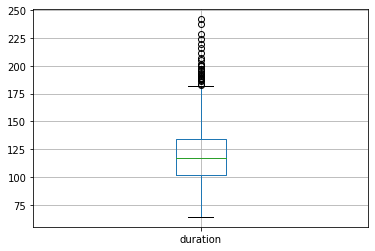

In [9]:
movies.boxplot(column='duration');
#I believe this boxplot highlights that the median duration is around 112 minutes. I think it also shows that the
#2nd and 3rd quartile are tightly packed from 100 to about 135 minutes of duration.
#I like how the whiskers show the shortest and longest values, and there appears to be quite a number of outliers
#above 175 minutes

## Intermediate level

#### Count how many movies have each of the content ratings.

In [71]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

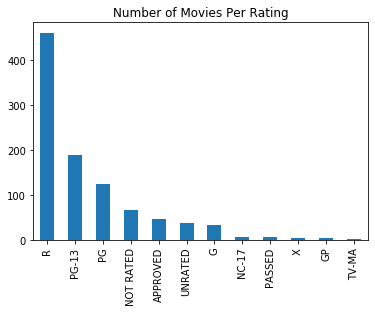

In [28]:
movies['content_rating'].value_counts().plot(x = 'Rating', y = 'Number of Movies', kind='bar', title='Number of Movies Per Rating');

#I created a view of the content rating, used the value_counts method to get the toal number of movies per rating, and
#plotted these ratings per movie on a bar chart. My tile showed up but for some reason my x and y axis labels did not
#I am not sure if the problem is I chose a view of the dataframe

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [72]:
movies_new = movies['content_rating'].replace(to_replace = ['NOT RATED', 'APPROVED', 'PASSED', 'GP'], value = 'UNRATED', inplace = True)
#I looked up the documentation for the .replace method, I had to first enter the value I wanted to replace under
#to_replace, since I wanted to replace multiple values I made a list of them
#then I had to enter value I wanted to change it to under value=, and I made inplace=True
#so the values would be replaced in the content_rating column
#as a check I ran movies['content_rating'].value_counts() to make sure my replace worked




#### Convert the following content ratings to "NC-17": X, TV-MA.

In [73]:
movies['content_rating'].replace(to_replace = ['X', 'TV-MA'], value = 'NC-17', inplace = True)

#I used the same approach as the previous block

#### Count the number of missing values in each column.

In [86]:
movies.isnull().sum()

#I used .isnull to identify columns with missing values, and the .sum() to add up the null values

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [87]:
query = movies.isnull().any(axis=1)
#I remeber in class we created a variable query to siolate which columns in the movies data frame have a null value
#specifically in any columns

In [96]:
movies[query]
#by looking into the movies using the query series, the rows where the content_rating column had a NaN value
#Now I could examine the movies that had null content_ratings. Since there were only 3 I looked up each movie
#online and found that Butch Cassidy and Where Eagles Dare are rated PG and True Grit was rated G
#I thought it was reasonable to mark them all as PG so that's what I did in the next block
#If there is a way to specify an index and replace each value precisely, e.g. give Butch and Where Eagles a PG rating
#and True Grit a G rating, I can do more research on that if you recommend it

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,PG,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,PG,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [97]:
movies['content_rating'].fillna('PG', inplace=True) 
#Here I am filling values that are null with PG in the content_rating column using the .fillna method we saw in lab

In [98]:
movies[query]
#this is my check that the fillna worked successfully

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,PG,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,PG,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [99]:
movies.isnull().sum()
#this is my check that no null values are left

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [122]:
longer = movies['duration'] >= 120
shorter = movies['duration'] < 120
#I created a variable longer which produced a series where the value of duration was greater than or equal to 120 min
#I created a variable shorter which produced a series where the value of duration was less than 120 min

In [120]:
movies[longer]['star_rating'].mean()
#I passed longer into my movies dataframe as a series and focused on the 'star_rating' label and took the average of
#that label

7.948898678414082

In [121]:
movies[shorter]['star_rating'].mean()
#I passed shorter into my movies dataframe as a series and focused on the 'star_rating' label and took the average of
#that label
#I see that longer movies have a slightly higher average rating of 7.95 compared to 7.84 for shorter movies

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

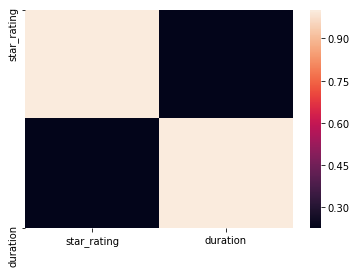

In [129]:
import seaborn as sns
sns.heatmap(movies.corr())
#based on the heatmap, there is a low correlation between duration and star rating, around 0.30 or less
#this leads me to believe there isn't a significant relationship between duration and star rating

#### Calculate the average duration for each genre.

In [190]:
movies5 = movies.groupby('genre')['duration'].mean()
movies5

#After thinking a long time about this (please see next block for my first attempt at this solution), I thought the
#easiest way to isolate all of the genres is to groupby them. This created a panel data frame on which I was able to 
#calculate the average duration

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [191]:
#This was my first attempt to answer the above genre duration question
#Even as I was typing it, I was thinking there has to be a better way
#I kept trying to isolate each drama by capturing it as a variable and then calculating the mean on the variable series
#After a while I was thinking there has to be an easier way to group by genre and I used the groupby method
#This was a huge realization for me of how powerful the pandas library is, where there is a short groupby solution
#compared to trying to use a mix of Python coding and pandas dataframes 

drama = movies['genre'] == 'Drama'
print("The average length of dramas is: " + str(round(movies[drama]['duration'].mean(), 2)) + " minutes")
      
comedy = movies['genre'] == 'Comedy'
print("The average length of comedies is: " + str(round(movies[comedy]['duration'].mean(), 2)) + " minutes")

action = movies['genre'] == 'Action'
print("The average length of action movies is: " + str(round(movies[action]['duration'].mean(), 2)) + " minutes")

crime = movies['genre'] == 'Crime'
print("The average length of crime movies is: " + str(round(movies[crime]['duration'].mean(), 2)) + " minutes")

biography = movies['genre'] == 'Biography'
print("The average length of biography movies is: " + str(round(movies[biography]['duration'].mean(), 2)) + " minutes")


The average length of dramas is: 126.54 minutes
The average length of comedies is: 107.6 minutes
The average length of action movies is: 126.49 minutes
The average length of crime movies is: 122.3 minutes
The average length of biography movies is: 131.84 minutes


## Advanced level

#### Visualize the relationship between content rating and duration.

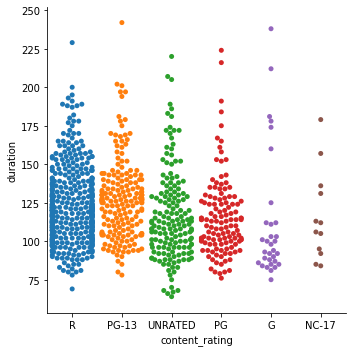

In [223]:
sns.catplot(x='content_rating', y='duration', kind = 'swarm', data=movies);
#I ran a catplot in Seaborn. I think one of the advantages of Seaborn over matplotlib mentioned in clase is that
#Seabron has more options for displaying categorical data like content_rating.
#Based on the results, it looks like rated G movies tend to bunch on the short side, less than 100 minutes in duration.
#Whereas rated R movies even has clustering up to 175 minutes in length. It seems with rated R movies they 
#have the flexibility of being long or short.

#### Determine the top rated movie (by star rating) for each genre.

In [215]:
top_movies = movies.groupby('genre')['star_rating'].max()
top_movies
#I know how to group by genre and find the highest rating in the genre, but I am having trouble displaying the 
#movie title

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [19]:
dupes = movies.duplicated(subset = 'title')
dupes.value_counts()
#I used the duplicated method and entered the argument subset= 'title' just to focus on dupes in the title column
#this tells me there are 4 duplicates

False    975
True       4
dtype: int64

In [21]:
movies[dupes]
#but when I look at the duplicates, I see the titles are not duplicated, so I determined there are no actual duplicate
#titles

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [32]:
movies['genre'].value_counts()
#this shows me the number of movies per genre, so I can take a look if there are more than 10 movies

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [51]:
drama_group = movies['genre'] == 'Drama'
drama_average = movies[drama_group]['star_rating'].mean()
print('The average star rating of dramas is: ' + str(drama))

comedy_group = movies['genre'] == 'Comedy'
comedy = movies[comedy_group]['star_rating'].mean()
print('The average star rating of comedies is: ' + str(comedy))

#this feels like a very manual solution. I am identifying all of the comedies, and then taking the average star rating
#of the comedies, and then printing it.
#Similar to my earlier groupby example, there's probably a more elegant way to do this

The average star rating of dramas is: 7.902517985611515
The average star rating of comedies is: 7.82243589743591


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [ ]:
#I don't have an answer for this yet, but I am going to keep working on it after the deadline.